In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2


# Checking Text to Binary-->

In [7]:
name="MynameisAadithya"

In [8]:
print("The Original String is:- "+name)

The Original String is:- MynameisAadithya


In [9]:
res=''.join(format(ord(i),'b')for i in name)

In [10]:
print(res)

1001101111100111011101100001110110111001011101001111001110000011100001110010011010011110100110100011110011100001


# Checking Binary to Text-->

In [12]:
def BinaryTointeger(binary):  
         
    binary1 = binary  
    decimal, i, n = 0, 0, 0
    while(binary != 0):  
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)  
        binary = binary//10
        i += 1
    return (decimal)     

bin_data =res
   
print("The binary value is:", bin_data) 
   

str_data =' '
   

for i in range(0, len(bin_data), 7): 
    temp_data = int(bin_data[i:i + 7]) 
    decimal_data = BinaryTointeger(temp_data) 
    str_data = str_data + chr(decimal_data)  
   

print("The Binary value after string conversion is:",str_data) 

The binary value is: 1001101111100111011101100001110110111001011101001111001110000011100001110010011010011110100110100011110011100001
The Binary value after string conversion is:  MynameisAadithya


# Function to convert the input message to Binary..

In [13]:
def message2binary(message):
  if type(message) == str:
    result= ''.join([ format(ord(i), "08b") for i in message ])
    
  elif type(message) == bytes or type(message) == np.ndarray:
    result= [ format(i, "08b") for i in message ]
    
  elif type(message) == int or type(message) == np.uint8:
    result=format(message, "08b")

  else:
    raise TypeError("Input type is not supported")
    
  return result  

# Here we are using 08b as we require 8 bit representation of binary digits.
# If we will be using only b then it will not add 0 to convert it into 8 bits and returns the binary converted value..


In [393]:
# message2binary("heloouserthisisrahul")

In [394]:
# message2binary("mynameisrahul")

In [395]:
# r,g,b=message2binary([50,35,155])

# Importing Image-->

In [14]:
from IPython.display import Image
import os

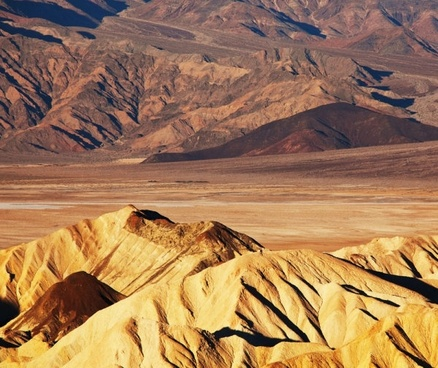

In [16]:
Image(r"C:\Users\admin\Desktop\Desktop\Steganography\images\original.jpeg")

In [17]:
image=cv2.imread(r"C:\Users\admin\Desktop\Desktop\Steganography\images\original.jpeg")

In [399]:
#image

In [400]:
# for i in image:
#     for pixel in i:
#         print(pixel)

# How to overwrite the LSB bit of a binary number and converting it to decimal..--> 

In [18]:
h='1000110'
int(h[:-1]+'1',2)

71

# [:-1] neglects the LSB bit then we can add a bit and by int(value,2) we will change it to new decimal value..

In [19]:
list1=[ ]

# ENCODER FUNCTION

In [20]:
def encode_data(img):
    data=input("Enter the data to be Encoded:")    
    if (len(data) == 0): 
      raise ValueError('Data is empty')
  
    filename = input("Enter the name of the New Image after Encoding(with extension):")
    
    no_bytes=(img.shape[0] * img.shape[1] * 3) // 8
    
    print("Maximum bytes to encode:", no_bytes)
    
    if(len(data)>no_bytes):
        raise ValueError("Error encountered Insufficient bytes, Need Bigger Image or give Less Data !!")
    
    # Using the below as delimeter
    data +='*****'    
    
    data_binary=message2binary(data)
    print(data_binary)
    data_len=len(data_binary)
    
    print("The Length of Binary data",data_len)
    
    data_index = 0
    
    for i in img:
        for pixel in i:
            
          r, g, b = message2binary(pixel)
         # print(r)
         # print(g)
         # print(b)
        #   print(pixel)
          if data_index < data_len:
              # hiding the data into LSB(Least Significant Bit) of Red Pixel
#               print("Original Binary",r)
              # print("The old pixel",pixel[0])
              pixel[0] = int(r[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Red Pixel
#               print("Changed binary",r[:-1] + data_binary[data_index])
              
              data_index += 1
              list1.append(pixel[0])

          if data_index < data_len:
             # hiding the data into LSB of Green Pixel
              pixel[1] = int(g[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Green Pixel
              data_index += 1
              list1.append(pixel[1])

          if data_index < data_len:
              # hiding the data into LSB of  Blue Pixel
              pixel[2] = int(b[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Blue pixel
              data_index += 1
              list1.append(pixel[2])

              # if data is encoded, just breaking out of the Loop
          if data_index >= data_len:
              break

         
  
    cv2.imwrite(filename,img)
    
    print("Encoded the data successfully and the image is successfully saved as ",filename)

# ENCODING THE DATA-->



In [21]:
encode_data(image)

Maximum bytes to encode: 60444
011011010111100101101110011000010110110101100101011010010111001101100001011000010110010001101001011101000110100001111001011000010010101000101010001010100010101000101010
The Length of Binary data 168
Encoded the data successfully and the image is successfully saved as  newencodedimage.jpeg


# DECODER FUNCTION-->


In [405]:
def decode_data(img):

  binary_data = ""
  for i in img:
      for pixel in i:
        
        #   print(pixel)
          r, g, b = message2binary(pixel) 
          binary_data += r[-1]  #Extracting Encoded data from the LSB bit of Red Pixel as we have stored in LSB bit of every pixel.
          binary_data += g[-1]  #Extracting Encoded data from the LSB bit of Green Pixel
          binary_data += b[-1]  #Extracting Encoded data from LSB bit of Blue Pixel

  # splitting by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]

  # Converting the bits to Characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "*****": #Checking if we have reached the delimeter which is "*****"
          break

  
  print("The Encoded data was :--",decoded_data[:-5])

# DECODING THE DATA-->


In [406]:
image1=cv2.imread("/content/stegano_final.png")

In [407]:
decode_data(image1)

The Encoded data was :-- My Name is Rahul


# The Original Image


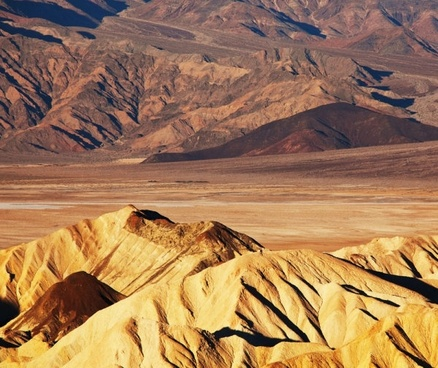

In [23]:
Image(r"C:\Users\admin\Desktop\Desktop\Steganography\images\original.jpeg")


# The Image after Encoding Data


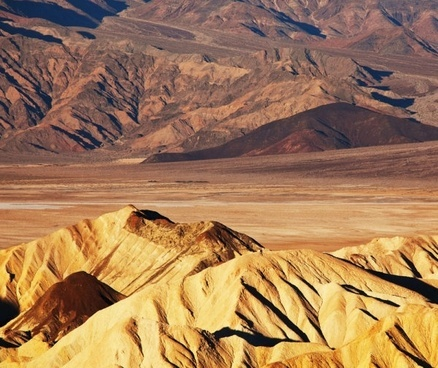

In [24]:
Image(r"C:\Users\admin\Desktop\Desktop\Steganography\newencodedimage.jpeg")

# Here we are seeing that after encoding the data also there is not much change in the image.Really we cannot find any difference between the original and the Steganographed image..